<center>
<img src="./pict/geopandas.png">
<br />
<br />

In [2]:
import shapely
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install geopandas # установка geopandas, или так: !conda install --channel conda-forge geopandas

In [3]:
from shapely.geometry import Polygon, Point, LineString

p1 = Polygon([(0, 0), (1, 0), (1, 1)]) # Polygons / Multi-Polygons
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
p4 = Point(0.5, 0.5) # Points / Multi-Points
p5 = Point(2.5, 0.5)
p6 = LineString([[1, 1], [2, 0]]) # Lines / Multi-Lines
p7 = LineString([[2, 1], [1, 0]])

gs = gpd.GeoSeries([p2, p1, p3, p4, p5, p6, p7]) # GeoSeries

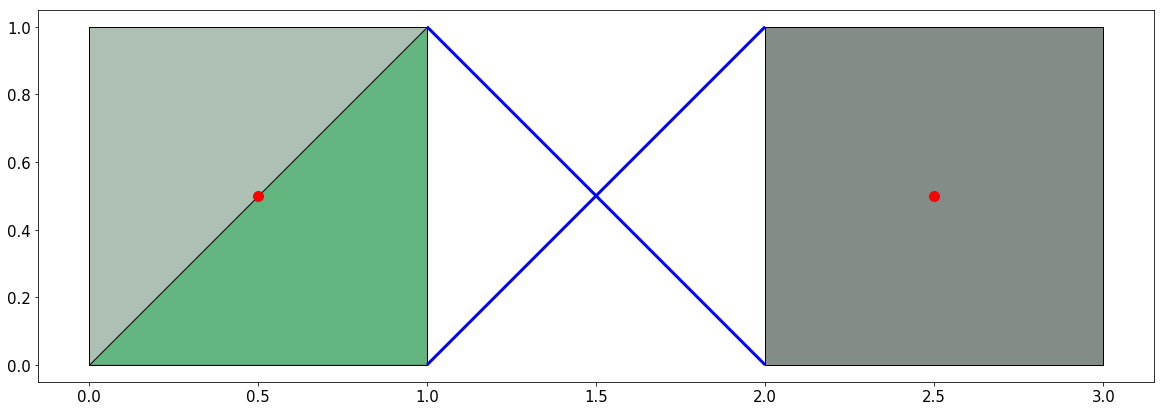

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

gs[:1].plot(ax=ax, facecolor='#aebfb4', edgecolor='black')
gs[1:2].plot(ax=ax, facecolor='#62b57f', edgecolor='black')
gs[2:3].plot(ax=ax, facecolor='#848c87', edgecolor='black')
gs[3:5].plot(ax=ax, facecolor='red', markersize=100)
gs[5:].plot(ax=ax, color='blue', linewidth=3)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

In [8]:
gs.area # площади фигур

0    1.0
1    0.5
2    1.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

In [14]:
gs.bounds # максимум и минимум для каждой оси каждой фигуры

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0
3,0.5,0.5,0.5,0.5
4,2.5,0.5,2.5,0.5
5,1.0,0.0,2.0,1.0
6,1.0,0.0,2.0,1.0


In [15]:
gs.total_bounds  # то же самое только для всей GeoSeries

array([0., 0., 3., 1.])

In [16]:
gs.boundary # границы фигур (низкоразмерное представление), для точки границ нет

0    LINESTRING (0.000 0.000, 1.000 0.000, 1.000 1....
1    LINESTRING (0.000 0.000, 1.000 0.000, 1.000 1....
2    LINESTRING (2.000 0.000, 3.000 0.000, 3.000 1....
3                             GEOMETRYCOLLECTION EMPTY
4                             GEOMETRYCOLLECTION EMPTY
5                MULTIPOINT (1.000 1.000, 2.000 0.000)
6                MULTIPOINT (2.000 1.000, 1.000 0.000)
dtype: geometry

In [17]:
gs.centroid # центроиды фигур

0    POINT (0.50000 0.50000)
1    POINT (0.66667 0.33333)
2    POINT (2.50000 0.50000)
3    POINT (0.50000 0.50000)
4    POINT (2.50000 0.50000)
5    POINT (1.50000 0.50000)
6    POINT (1.50000 0.50000)
dtype: geometry

In [18]:
gs.representative_point() # точки, которые гарантировано находятся внутри фигуры (необязательно центроиды)

0    POINT (0.50000 0.50000)
1    POINT (0.75000 0.50000)
2    POINT (2.50000 0.50000)
3    POINT (0.50000 0.50000)
4    POINT (2.50000 0.50000)
5    POINT (1.00000 1.00000)
6    POINT (2.00000 1.00000)
dtype: geometry

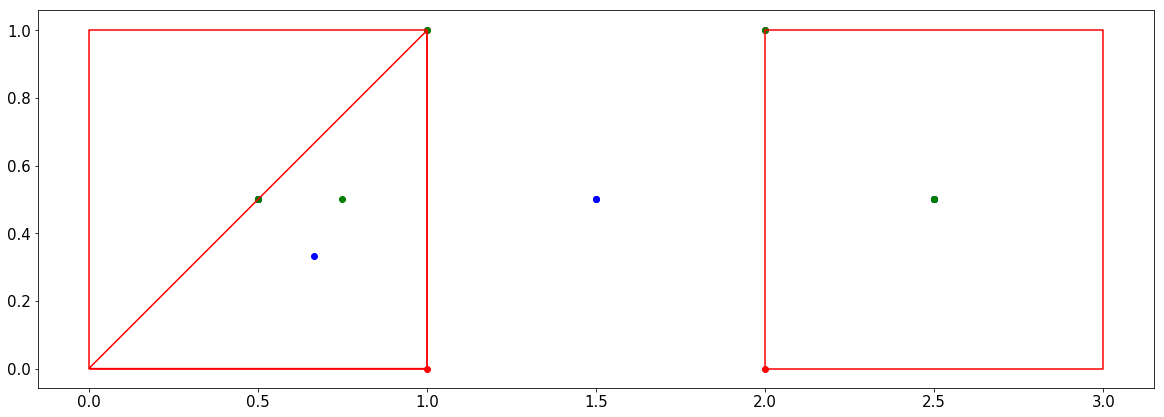

In [19]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

gs.boundary.plot(ax=ax, color='red')
gs.centroid.plot(ax=ax, color='blue')
gs.representative_point().plot(ax=ax, color='green')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

In [11]:
gs.convex_hull # возвращает минимальную выпуклую фигуру, содержающую изначальную. Для двух точек - линия, 
                # для точки - точка

0    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1....
2    POLYGON ((2.00000 0.00000, 2.00000 1.00000, 3....
3                              POINT (0.50000 0.50000)
4                              POINT (2.50000 0.50000)
5        LINESTRING (1.00000 1.00000, 2.00000 0.00000)
6        LINESTRING (2.00000 1.00000, 1.00000 0.00000)
dtype: geometry

In [12]:
gs.envelope # минимальный прямоугольный полигон (стороны параллельны осям), содержащий каждую из исходных фигур

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3                              POINT (0.50000 0.50000)
4                              POINT (2.50000 0.50000)
5    POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....
6    POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....
dtype: geometry

In [13]:
gs.buffer(0.1) # возвращает все точки находящиеся на расстояние r от фигуры

0    POLYGON ((-0.10000 0.00000, -0.10000 1.00000, ...
1    POLYGON ((-0.07071 0.07071, 0.92929 1.07071, 0...
2    POLYGON ((1.90000 0.00000, 1.90000 1.00000, 1....
3    POLYGON ((0.60000 0.50000, 0.59952 0.49020, 0....
4    POLYGON ((2.60000 0.50000, 2.59952 0.49020, 2....
5    POLYGON ((2.07071 0.07071, 2.07730 0.06344, 2....
6    POLYGON ((1.07071 -0.07071, 1.06344 -0.07730, ...
dtype: geometry

In [14]:
gs.simplify(tolerance=0.05) # возвращает упрощенное представление фигуры

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3                              POINT (0.50000 0.50000)
4                              POINT (2.50000 0.50000)
5        LINESTRING (1.00000 1.00000, 2.00000 0.00000)
6        LINESTRING (2.00000 1.00000, 1.00000 0.00000)
dtype: geometry

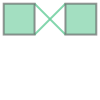

In [20]:
gs.unary_union # объединение всех фигур в GeoSeries

In [22]:
type(gs.unary_union) # GeometryCollection

shapely.geometry.collection.GeometryCollection

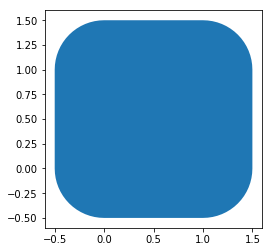

In [28]:
gs[:1].buffer(0.5).plot()

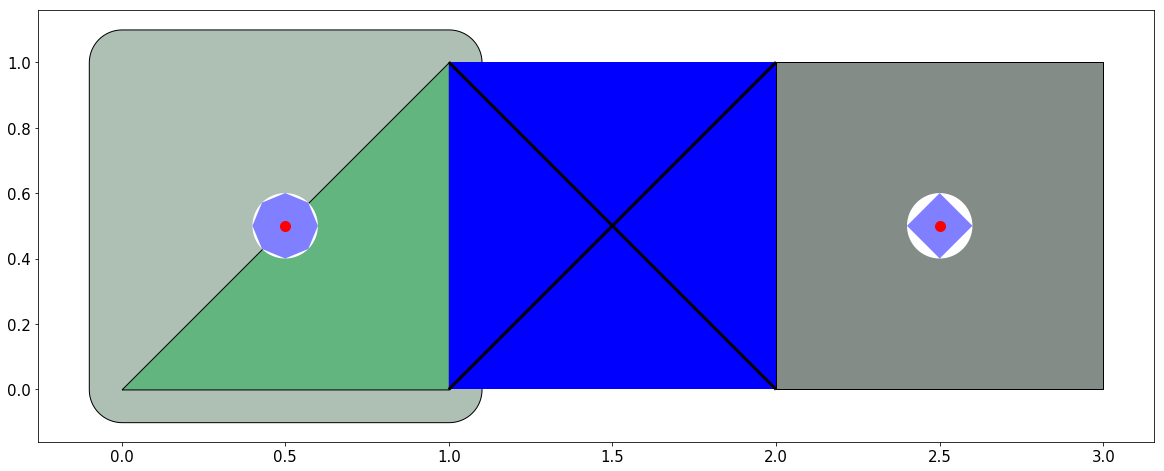

In [30]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

gs[:1].buffer(0.1).plot(ax=ax, facecolor='#aebfb4', edgecolor='black')
gs[1:2].plot(ax=ax, facecolor='#62b57f', edgecolor='black')
gs[2:3].plot(ax=ax, facecolor='#848c87', edgecolor='black')

gs[3:5].buffer(0.1).plot(ax=ax, facecolor='white', markersize=100)
gs[3:4].buffer(0.1).simplify(tolerance=0.01).plot(ax=ax, color='blue', alpha=0.5)
gs[4:5].buffer(0.1).simplify(tolerance=0.1).plot(ax=ax, color='blue', alpha=0.5)
gs[3:5].plot(ax=ax, facecolor='red', markersize=100)

gs[5:].envelope.plot(ax=ax, color='blue', linewidth=3)
gs[5:].plot(ax=ax, color='black', linewidth=3)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

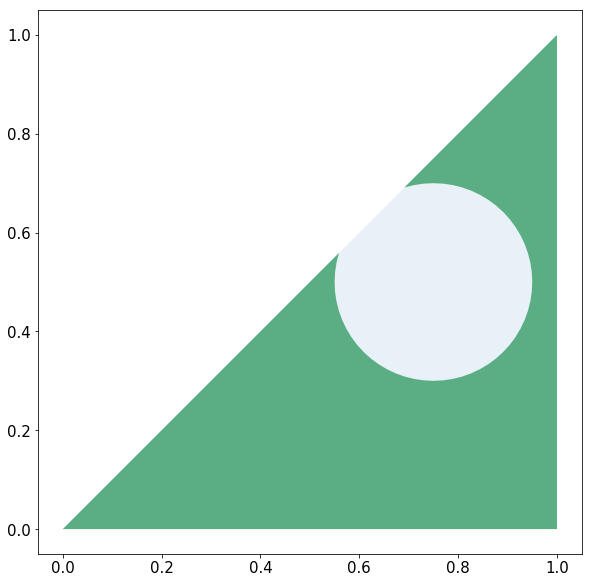

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

triangle = gs[1:2].values[0]
circle = gs[1:2].representative_point().buffer(0.2).values[0]

diff = gpd.GeoSeries([triangle - circle])
diff.plot(ax=ax, color='#62b57f')
diff.convex_hull.plot(ax=ax, alpha=0.1)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

In [19]:
diff.geom_almost_equals(triangle) # проверка на "почти" равенство

0    False
dtype: bool

In [40]:
diff.intersects(triangle) # проверка на пересечение с фигурой

0    True
dtype: bool

In [41]:
diff.contains(triangle) # проверка на вхождени

0    False
dtype: bool

In [42]:
gpd.GeoSeries([triangle]).contains(diff)

0    True
dtype: bool

In [44]:
type(diff.values[0])

shapely.geometry.polygon.Polygon

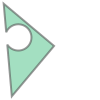

In [48]:
shapely.affinity.rotate(diff.values[0], 50) # вращение фигуры

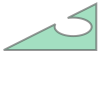

In [51]:
shapely.affinity.scale(diff.values[0], xfact=10, yfact=5.0) # масштабирование фигуры

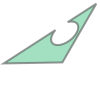

In [54]:
shapely.affinity.skew(diff.values[0], xs=30, ys=1) # наклоны

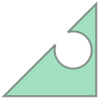

In [55]:
shapely.affinity.translate(diff.values[0], xoff=3.0, yoff=5.0, zoff=0.0)

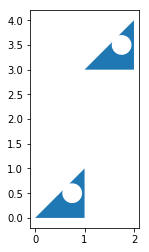

In [58]:
gpd.GeoSeries([diff.values[0], # сдвиги по осям
               shapely.affinity.translate(diff.values[0], xoff=1.0, yoff=3.0, zoff=0.0)]).plot()

In [28]:
# еще больше вариантов преобразований
# https://shapely.readthedocs.io/en/stable/manual.html#affine-transformations

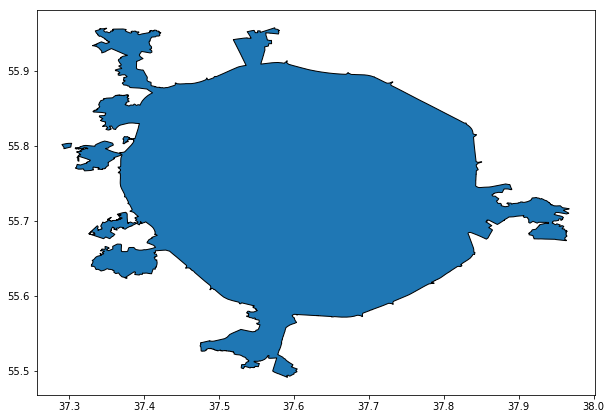

In [127]:
# считывание гео-данных 

moscow_from_link = gpd.read_file('http://polygons.openstreetmap.fr/get_geojson.py?id=2555133&params=0')
moscow_from_link['geometry'] = moscow_from_link['geometry'].apply(lambda x: x[0])
moscow_from_link.plot(edgecolor='black', figsize=(10, 10))

In [62]:
# из файла json
moscow_from_json = gpd.read_file('./data/moscow.json')
moscow_from_json['geometry'] = moscow_from_json['geometry'].apply(lambda x: x[0])

# запись в geojson
# moscow_from_json.to_file("moscow_from_json.geojson", driver='GeoJSON')

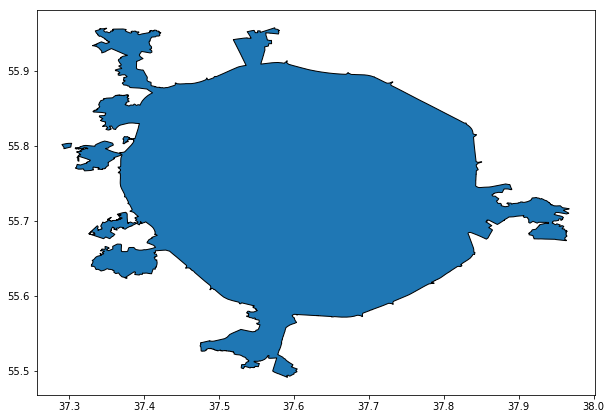

In [63]:
moscow_from_json.plot(edgecolor='black', figsize=(10, 10))

In [66]:
moscow_from_json['name'] = 'Москва'

In [64]:
type(moscow_from_json) # GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [74]:
moscow_from_json # обязательный атрибут GeoDataFrame - поле geometry

,geometry,name
0,"MULTIPOLYGON (((37.29822 55.79763, 37.29447 55...",Москва


In [73]:
moscow_from_json.crs # проекция, их очень много и разных - https://en.wikipedia.org/wiki/Map_projection

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

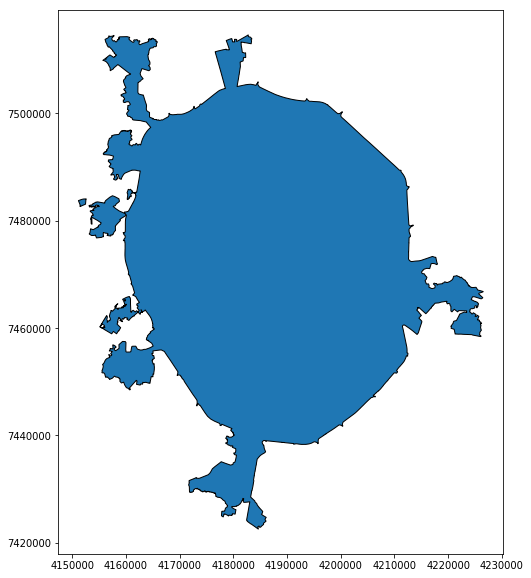

In [76]:
# преобразование проекций, 3395 - проекция меркатора 
moscow_from_json.to_crs(epsg=3395).plot(edgecolor='black', figsize=(10, 10))

In [77]:
coronavirus_cases = pd.read_csv('./data/coronavirus_cases.csv')
coronavirus_cases = coronavirus_cases.dropna()
coronavirus_cases.head()

,#,address,date,lat,long
0,1,"3-й квартал Капотни, 3",28-30 марта,55.635714,37.802126
1,2,"4-й квартал Капотни, 9",28-30 марта,55.636395,37.792573
2,3,"Авиаторов,6, к1",28-30 марта,55.647897,37.394463
3,4,"Адмирала Лазарева, 38",28-30 марта,55.546076,37.523417
4,5,"Академика Комарова, 7а",28-30 марта,55.828914,37.592907


In [79]:
geometry = []
for _, row in coronavirus_cases.iterrows():
    geometry.append(Point(row.long, row.lat))
    
coronavirus_cases['geometry'] = geometry
coronavirus_cases = gpd.GeoDataFrame(coronavirus_cases)

In [84]:
coronavirus_cases.head()

,#,address,date,lat,long,geometry
0,1,"3-й квартал Капотни, 3",28-30 марта,55.635714,37.802126,POINT (37.80213 55.63571)
1,2,"4-й квартал Капотни, 9",28-30 марта,55.636395,37.792573,POINT (37.79257 55.63639)
2,3,"Авиаторов,6, к1",28-30 марта,55.647897,37.394463,POINT (37.39446 55.64790)
3,4,"Адмирала Лазарева, 38",28-30 марта,55.546076,37.523417,POINT (37.52342 55.54608)
4,5,"Академика Комарова, 7а",28-30 марта,55.828914,37.592907,POINT (37.59291 55.82891)


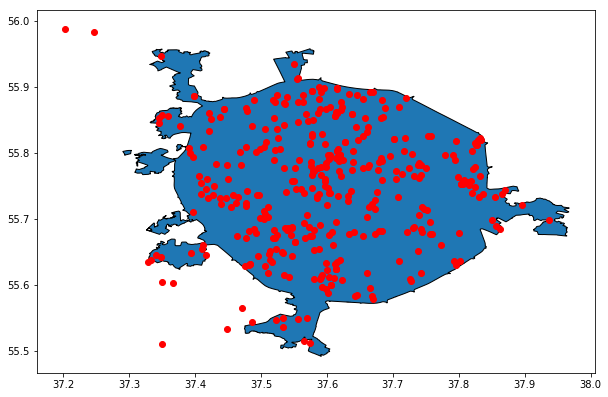

In [85]:
ax = moscow_from_json.plot(edgecolor='black', figsize=(10, 10))
coronavirus_cases.plot(ax=ax, color='red')

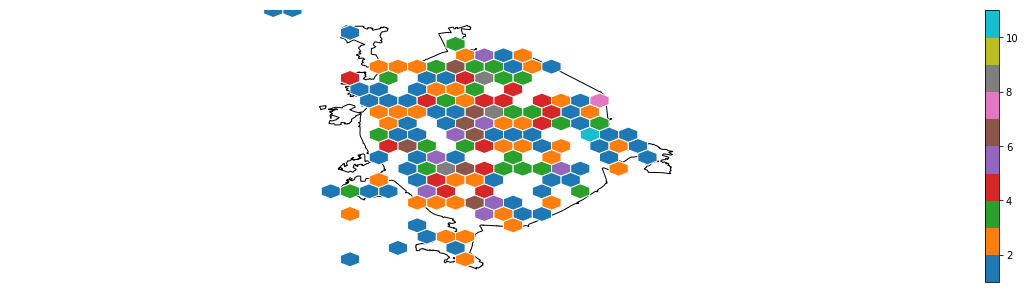

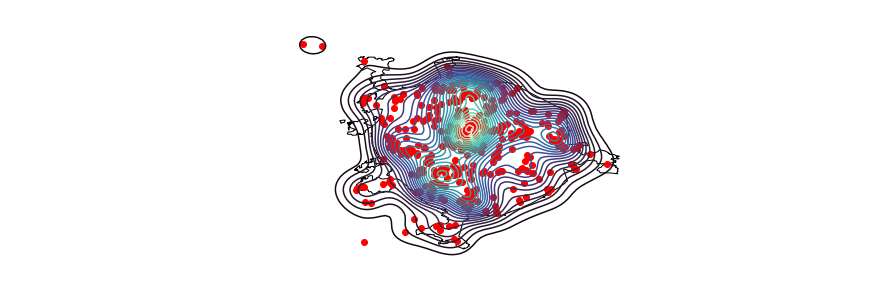

In [38]:
import seaborn as sns

f, ax = plt.subplots(1, figsize=(20, 5))
moscow_from_link.plot(ax=ax, facecolor='white', edgecolor='black')
hb = ax.hexbin(coronavirus_cases['geometry'].x, coronavirus_cases['geometry'].y, 
               gridsize=20, mincnt=1, edgecolor='white', cmap='tab10')
ax.set_axis_off()
plt.colorbar(hb)
plt.axis('equal')
plt.show()

f, ax = plt.subplots(1, figsize=(15, 5))
moscow_from_link.plot(ax=ax, facecolor='white', edgecolor='black')
sns.kdeplot(coronavirus_cases['geometry'].x, coronavirus_cases['geometry'].y, n_levels=30, cmap='mako')
coronavirus_cases.plot(ax=ax, color='red')
ax.set_axis_off()
plt.axis('equal')
plt.show()

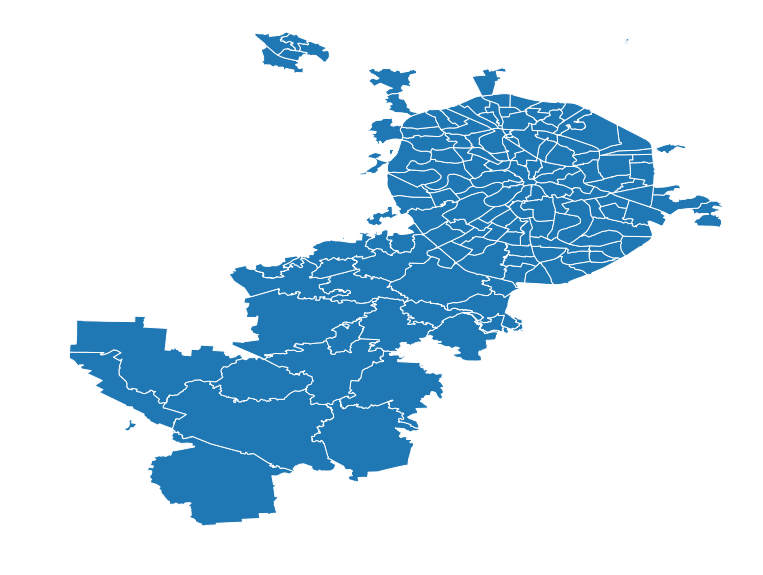

In [88]:
# чтение из shape файла
big_moscow = gpd.read_file('./data/big_moscow.shp')
big_moscow_districts = gpd.read_file('./data/big_moscow_districts.shp')

# запись в shape файл
# big_moscow.to_file(driver='ESRI Shapefile', filename="./data/big_moscow.shp")

ax = big_moscow_districts.plot(figsize=(20, 10), edgecolor='white')
ax.set_axis_off()

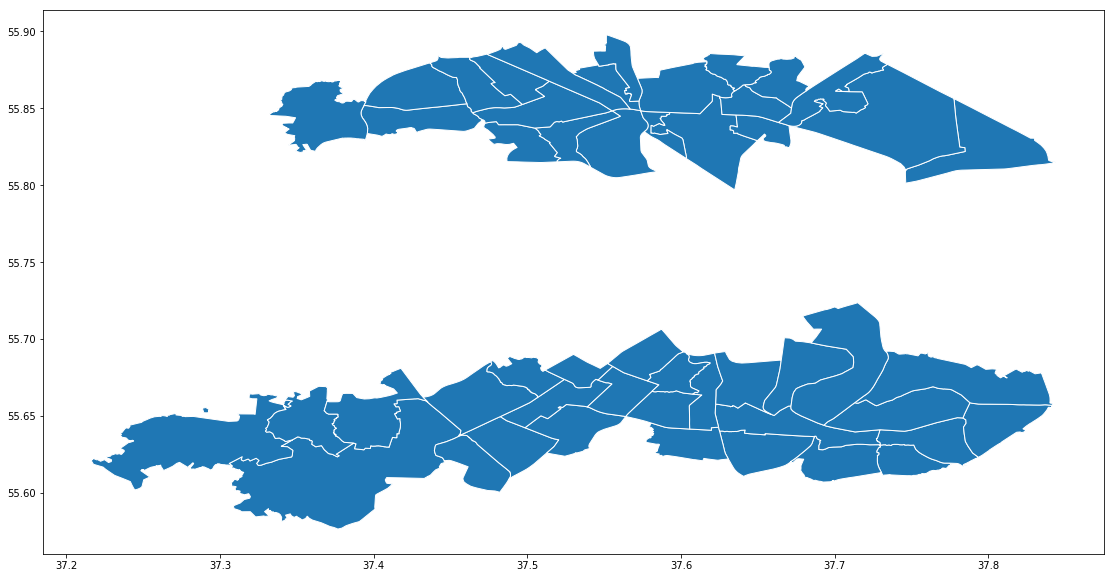

In [101]:
big_moscow_districts.iloc[50:100].plot(figsize=(20, 10), edgecolor='white')

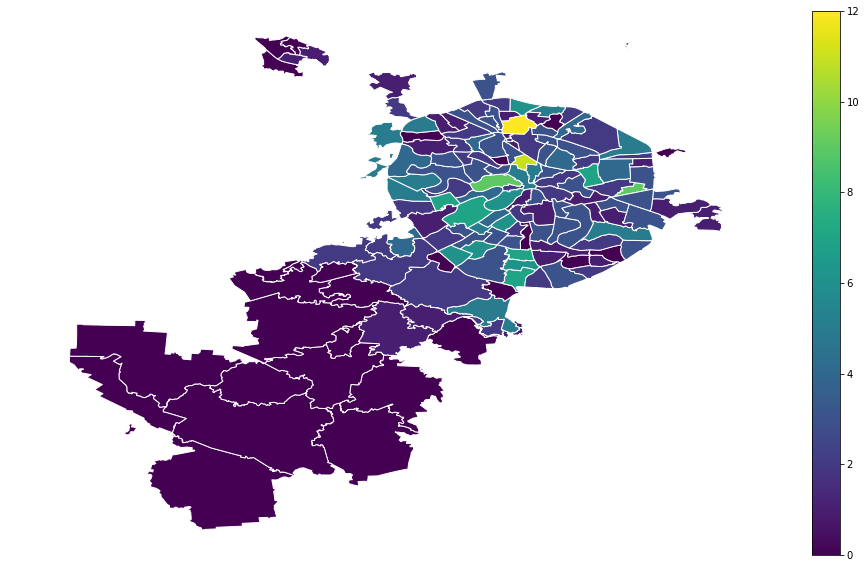

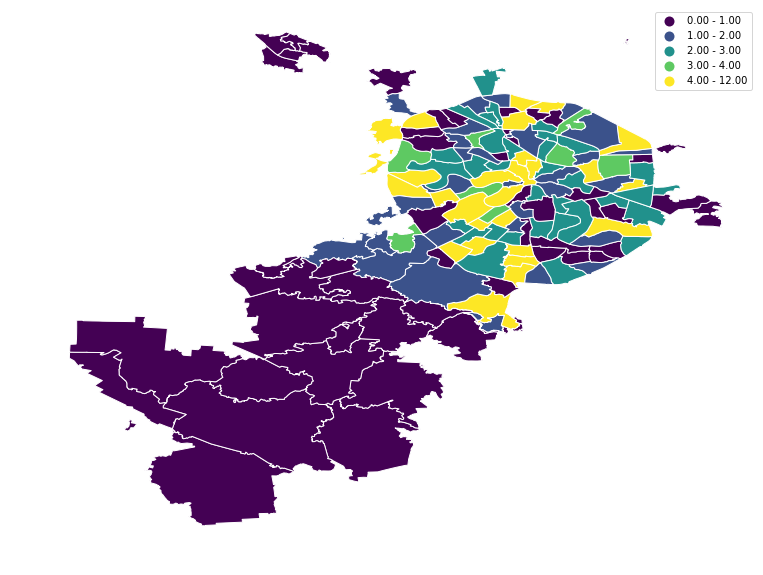

In [106]:
big_moscow_districts['coronavirus_cases'] = big_moscow_districts['geometry']\
                .apply(lambda x: sum([point.within(x) for point in coronavirus_cases.geometry])) # within

ax = big_moscow_districts.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               edgecolor='white', legend=True)
ax.set_axis_off()

ax = big_moscow_districts.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               scheme='quantiles', # equal_interval
                               edgecolor='white', legend=True) # pySAL
ax.set_axis_off()

In [109]:
buffer_cases = gpd.GeoDataFrame(coronavirus_cases.geometry.buffer(0.01), columns=['geometry'])

In [113]:
overlay = gpd.overlay(buffer_cases, big_moscow_districts) # overlay 

/Users/aleksey_ryabykh/anaconda3/lib/python3.6/site-packages/geopandas/base.py:48: UserWarning: GeoSeries crs mismatch: None and epsg:4326
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


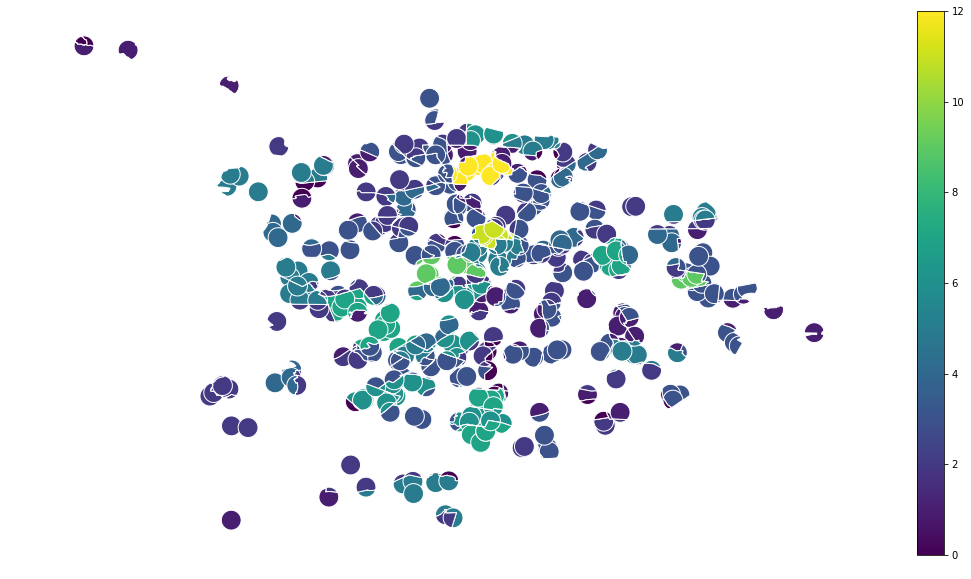

In [114]:
ax = overlay.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               edgecolor='white', legend=True)
ax.set_axis_off() 

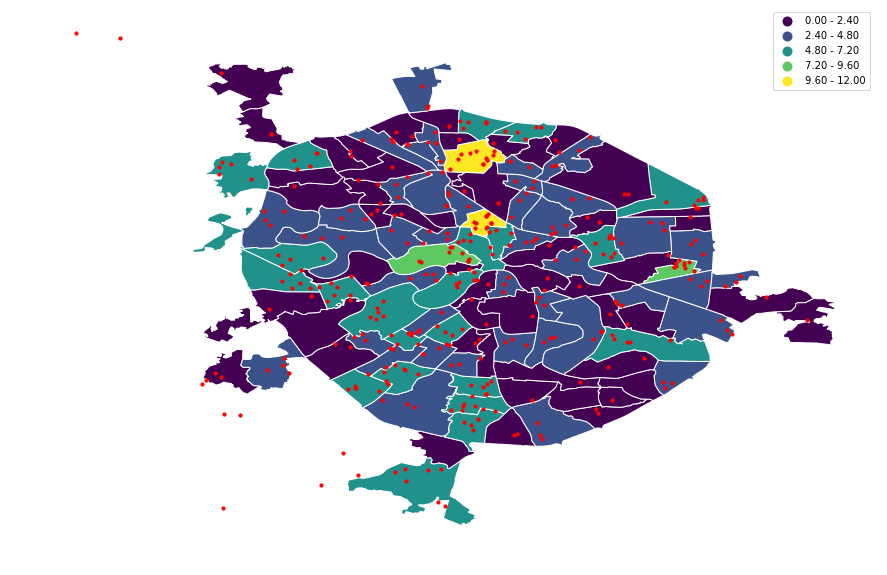

In [115]:
small_moscow_districts = gpd.overlay(moscow_from_json, big_moscow_districts) # overlay
ax = small_moscow_districts.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               scheme='equal_interval',
                               edgecolor='white', legend=True)
coronavirus_cases.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

In [125]:
small_moscow_districts['name'] = 'Москва'
spatial_join = gpd.sjoin(big_moscow_districts, small_moscow_districts, op='within', how='left') 
spatial_join.name = spatial_join.name.fillna('Новая Москва') # пространственный join

In [52]:
spatial_join.dissolve(by='name', aggfunc='sum') # агрегация

,geometry,FID_left,coronavirus_cases_left,index_right,FID_right,coronavirus_cases_right
name,,,,,,
Москва,"POLYGON ((37.56400 55.64946, 37.56338 55.64862...",5011,243,4537.0,5011.0,243.0
Новая Москва,"MULTIPOLYGON (((36.92267 55.32386, 36.91945 55...",5574,136,0.0,0.0,0.0
